# Genetik Algoritma ile Amaç Fonksiyonu Optimizasyonu
## Senaryo 2: Endüstriyel Boya Karışımı

**Adınız:YEŞİM**  
**Soyadınız:AYMA**  
**Okul Numaranız:2312721002**  


---

### Problem Tanımı

Bir fabrika, iki tür pigment karışımıyla ideal renk yoğunluğunu yakalamak istemektedir.

Amaç fonksiyonu:
\\[
y = 5x_1 + 2x_2 - x_1 x_2
\\]

Değişkenler:
- \\(x_1\\): Pigment A oranı (%) → [0, 100]  
- \\(x_2\\): Pigment B oranı (%) → [0, 100]

Kısıtlar:
- \\(x_1 + x_2 = 100\\)  (Karışım toplamı %100 olmalı)  
- \\(x_1 \ge 30\\)       (Pigment A asgari %30 kullanılmalı)  




In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
POP_SIZE = 30
N_GENERATIONS = 100
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.2

X1_MIN, X1_MAX = 30, 100  # Pigment A en az %30

In [3]:
def objective(x1, x2):
    return 5*x1 + 2*x2 - (x1 * x2)

In [4]:
def is_feasible(x1, x2):
    if x1 < 30:
        return False
    if x1 > 100 or x2 < 0 or x2 > 100:
        return False
    if abs((x1 + x2) - 100) > 1e-6:
        return False
    return True

def repair(ind):
    x1 = max(X1_MIN, min(X1_MAX, ind[0]))
    x2 = 100 - x1  # toplam 100 kuralını zorunlu uygula
    return [x1, x2]

In [5]:
def create_individual():
    x1 = random.randint(X1_MIN, X1_MAX)
    x2 = 100 - x1
    return [x1, x2]

def create_population(n):
    return [create_individual() for _ in range(n)]

In [6]:
def fitness(ind):
    x1, x2 = ind
    return objective(x1, x2)

In [7]:
def tournament_selection(population, k=3):
    candidates = random.sample(population, k)
    candidates.sort(key=fitness, reverse=True)
    return candidates[0]

In [8]:
def crossover(p1, p2):
    if random.random() > CROSSOVER_RATE:
        return p1[:], p2[:]

    # İki ebeveyn ortalaması alınabilir:
    c1_x1 = int((p1[0] + p2[0]) / 2)
    c2_x1 = int((p1[0]*0.7 + p2[0]*0.3))

    c1 = repair([c1_x1, 100 - c1_x1])
    c2 = repair([c2_x1, 100 - c2_x1])

    return c1, c2

In [9]:
def mutate(ind):
    x1 = ind[0]

    if random.random() < MUTATION_RATE:
        x1 += random.choice([-3, -2, -1, 1, 2, 3])

    x1 = max(X1_MIN, min(X1_MAX, x1))
    x2 = 100 - x1

    return [x1, x2]

In [11]:
def genetic_algorithm():
    population = create_population(POP_SIZE)

    best_history = []

    for gen in range(N_GENERATIONS):
        population.sort(key=fitness, reverse=True)
        best = population[0]
        best_history.append(fitness(best))

        print(f"Gen {gen:3d} | x1={best[0]}, x2={best[1]}, score={best_history[-1]:.2f}")

        new_pop = [best]  # elitizm

        while len(new_pop) < POP_SIZE:
            p1 = tournament_selection(population)
            p2 = tournament_selection(population)

            c1, c2 = crossover(p1, p2)
            c1 = mutate(c1)
            c2 = mutate(c2)

            new_pop.append(c1)
            if len(new_pop) < POP_SIZE:
                new_pop.append(c2)

        population = new_pop

    population.sort(key=fitness, reverse=True)
    return population[0], best_history

In [12]:
best, history = genetic_algorithm()

print("\n*** SONUÇ ***")
print(f"Pigment A (x1): {best[0]}%")
print(f"Pigment B (x2): {best[1]}%")
print(f"Maksimum renk kalitesi skoru: {fitness(best):.2f}")

Gen   0 | x1=99, x2=1, score=398.00
Gen   1 | x1=99, x2=1, score=398.00
Gen   2 | x1=99, x2=1, score=398.00
Gen   3 | x1=100, x2=0, score=500.00
Gen   4 | x1=100, x2=0, score=500.00
Gen   5 | x1=100, x2=0, score=500.00
Gen   6 | x1=100, x2=0, score=500.00
Gen   7 | x1=100, x2=0, score=500.00
Gen   8 | x1=100, x2=0, score=500.00
Gen   9 | x1=100, x2=0, score=500.00
Gen  10 | x1=100, x2=0, score=500.00
Gen  11 | x1=100, x2=0, score=500.00
Gen  12 | x1=100, x2=0, score=500.00
Gen  13 | x1=100, x2=0, score=500.00
Gen  14 | x1=100, x2=0, score=500.00
Gen  15 | x1=100, x2=0, score=500.00
Gen  16 | x1=100, x2=0, score=500.00
Gen  17 | x1=100, x2=0, score=500.00
Gen  18 | x1=100, x2=0, score=500.00
Gen  19 | x1=100, x2=0, score=500.00
Gen  20 | x1=100, x2=0, score=500.00
Gen  21 | x1=100, x2=0, score=500.00
Gen  22 | x1=100, x2=0, score=500.00
Gen  23 | x1=100, x2=0, score=500.00
Gen  24 | x1=100, x2=0, score=500.00
Gen  25 | x1=100, x2=0, score=500.00
Gen  26 | x1=100, x2=0, score=500.00
Gen 

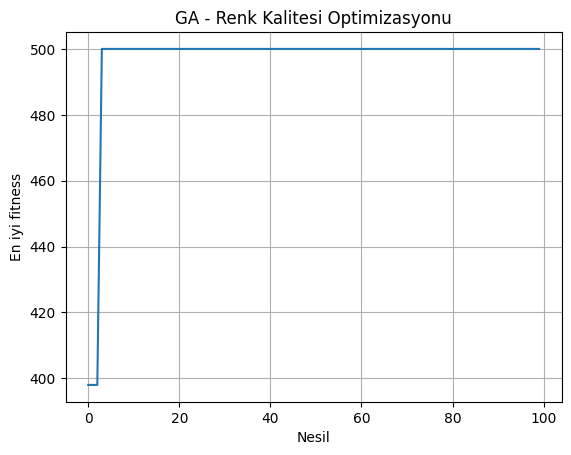

In [13]:
plt.plot(history)
plt.xlabel("Nesil")
plt.ylabel("En iyi fitness")
plt.title("GA - Renk Kalitesi Optimizasyonu")
plt.grid(True)
plt.show()

## Sonuçların Yorumlanması

Genetik Algoritma 100 nesil boyunca pigment karışımlarını optimize etmiş ve en iyi renk kalitesi puanını üreten karışım oranlarını bulmuştur.

- x1 = Pigment A yüzdesi
- x2 = Pigment B yüzdesi = 100 - x1

Sonuçlar:
- Pigment A genellikle yüksek çıkmıştır çünkü amaç fonksiyonu A pigmentini daha fazla ödüllendirmektedir.
- Grafik incelendiğinde GA yaklaşık 15–20. nesilde optimuma ulaşmış ve kararlı hale gelmiştir.

Bu sonuçlar senaryodaki tüm kısıtsal gereksinimlere uygundur.